In [1]:
# Northern Lights Air (NLA) is a Canada-based airline operating a customer loyalty program.
# To boost loyalty program enrollment, NLA ran a targeted promotional campaign between February and April 2018.

# This dataset includes:
# - Loyalty program enrollments and cancellations
# - Customer demographic attributes
# - Monthly flight activity

# The goal of this analysis is to evaluate the effectiveness of the campaign and understand its impact on customer behavior.

# ANALYSIS QUESTIONS
# ---------------------------------------------------------------------
# 1. What impact did the campaign have on loyalty program memberships?
#    - Gross enrollments
#    - Net membership growth

# 2. Was campaign adoption more successful for certain customer demographics?

# 3. Did customers who joined during the campaign fly more during the following summer?


In [2]:
# Import required libraries
import pandas as pd
import numpy as np

# Display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)


In [3]:
# Load datasets
loyalty_history = pd.read_csv(r"C:\Users\digvi\Desktop\Sharpener\Portfolio\Python\Airline+Loyalty+Program\Customer Loyalty History.csv")
flight_activity = pd.read_csv(r"C:\Users\digvi\Desktop\Sharpener\Portfolio\Python\Airline+Loyalty+Program\Customer Flight Activity.csv")
calendar = pd.read_csv(r"C:\Users\digvi\Desktop\Sharpener\Portfolio\Python\Airline+Loyalty+Program\Calendar.csv")
data_dictionary = pd.read_csv(r"C:\Users\digvi\Desktop\Sharpener\Portfolio\Python\Airline+Loyalty+Program\Airline Loyalty Data Dictionary.csv")


In [4]:
# Store datasets in a dictionary for quick inspection
datasets = {
    "Loyalty History": loyalty_history,
    "Flight Activity": flight_activity,
    "Calendar": calendar,
    "Data Dictionary": data_dictionary
}

for name, df in datasets.items():
    print(f"\n{name}")
    print("Shape:", df.shape)



Loyalty History
Shape: (16737, 16)

Flight Activity
Shape: (392936, 8)

Calendar
Shape: (2557, 4)

Data Dictionary
Shape: (24, 3)


In [5]:
# Preview datasets
loyalty_history.head()


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [6]:
loyalty_history.head()


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN


In [7]:
flight_activity.head()


,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0


In [8]:
data_dictionary.head()


,Table,Field,Description
0,Customer Flight Activity,Loyalty Number,Customer's unique loyalty number
1,NaN,Year,Year of the period
2,NaN,Month,Month of the period
3,NaN,Total Flights,Sum of Flights Booked (all tickets purchased i...
4,NaN,Distance,Flight distance traveled in the period (km)


In [9]:
# Inspect data structure
loyalty_history.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [10]:
flight_activity.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392936 entries, 0 to 392935
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               392936 non-null  int64  
 1   Year                         392936 non-null  int64  
 2   Month                        392936 non-null  int64  
 3   Total Flights                392936 non-null  int64  
 4   Distance                     392936 non-null  int64  
 5   Points Accumulated           392936 non-null  float64
 6   Points Redeemed              392936 non-null  int64  
 7   Dollar Cost Points Redeemed  392936 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 24.0 MB


In [11]:
# Check missing values
loyalty_history.isna().sum().sort_values(ascending=False)


Cancellation Year     14670
Cancellation Month    14670
Salary                 4238
Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
dtype: int64

In [12]:
flight_activity.isna().sum().sort_values(ascending=False)


Loyalty Number                 0
Year                           0
Month                          0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [13]:
# Check duplicate rows
loyalty_history.duplicated().sum()


np.int64(0)

In [14]:
flight_activity.duplicated().sum()


np.int64(1922)

In [15]:
# View duplicate loyalty records if any
loyalty_history[loyalty_history.duplicated(keep=False)]


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


In [16]:
# Count unique customers
loyalty_history['Loyalty Number'].nunique()


16737

In [17]:
flight_activity['Loyalty Number'].nunique()


16737

In [18]:
flight_activity.head()


,Loyalty Number,Year,Month,Total Flights,Distance,Points Accumulated,Points Redeemed,Dollar Cost Points Redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0


In [19]:
data_dictionary.head()


,Table,Field,Description
0,Customer Flight Activity,Loyalty Number,Customer's unique loyalty number
1,NaN,Year,Year of the period
2,NaN,Month,Month of the period
3,NaN,Total Flights,Sum of Flights Booked (all tickets purchased i...
4,NaN,Distance,Flight distance traveled in the period (km)


In [20]:
loyalty_history.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 16 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Loyalty Number      16737 non-null  int64  
 1   Country             16737 non-null  object 
 2   Province            16737 non-null  object 
 3   City                16737 non-null  object 
 4   Postal Code         16737 non-null  object 
 5   Gender              16737 non-null  object 
 6   Education           16737 non-null  object 
 7   Salary              12499 non-null  float64
 8   Marital Status      16737 non-null  object 
 9   Loyalty Card        16737 non-null  object 
 10  CLV                 16737 non-null  float64
 11  Enrollment Type     16737 non-null  object 
 12  Enrollment Year     16737 non-null  int64  
 13  Enrollment Month    16737 non-null  int64  
 14  Cancellation Year   2067 non-null   float64
 15  Cancellation Month  2067 non-null   float64
dtypes: f

In [21]:
flight_activity.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 392936 entries, 0 to 392935
Data columns (total 8 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   Loyalty Number               392936 non-null  int64  
 1   Year                         392936 non-null  int64  
 2   Month                        392936 non-null  int64  
 3   Total Flights                392936 non-null  int64  
 4   Distance                     392936 non-null  int64  
 5   Points Accumulated           392936 non-null  float64
 6   Points Redeemed              392936 non-null  int64  
 7   Dollar Cost Points Redeemed  392936 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 24.0 MB


In [22]:
loyalty_history.isna().sum().sort_values(ascending=False)


Cancellation Year     14670
Cancellation Month    14670
Salary                 4238
Loyalty Number            0
Country                   0
Province                  0
City                      0
Postal Code               0
Gender                    0
Education                 0
Marital Status            0
Loyalty Card              0
CLV                       0
Enrollment Type           0
Enrollment Year           0
Enrollment Month          0
dtype: int64

In [23]:
flight_activity.isna().sum().sort_values(ascending=False)


Loyalty Number                 0
Year                           0
Month                          0
Total Flights                  0
Distance                       0
Points Accumulated             0
Points Redeemed                0
Dollar Cost Points Redeemed    0
dtype: int64

In [24]:
loyalty_history.duplicated().sum()


np.int64(0)

In [25]:
flight_activity.duplicated().sum()


np.int64(1922)

In [26]:
loyalty_history[loyalty_history.duplicated(keep=False)]


,Loyalty Number,Country,Province,City,Postal Code,Gender,Education,Salary,Marital Status,Loyalty Card,CLV,Enrollment Type,Enrollment Year,Enrollment Month,Cancellation Year,Cancellation Month


In [27]:
loyalty_history['Loyalty Number'].nunique()


16737

In [28]:
flight_activity['Loyalty Number'].nunique()


16737

In [29]:
# Inspect column names
loyalty_history.columns


Index(['Loyalty Number', 'Country', 'Province', 'City', 'Postal Code',
       'Gender', 'Education', 'Salary', 'Marital Status', 'Loyalty Card',
       'CLV', 'Enrollment Type', 'Enrollment Year', 'Enrollment Month',
       'Cancellation Year', 'Cancellation Month'],
      dtype='object')

In [30]:
for col in loyalty_history.columns:
    print(col)


Loyalty Number
Country
Province
City
Postal Code
Gender
Education
Salary
Marital Status
Loyalty Card
CLV
Enrollment Type
Enrollment Year
Enrollment Month
Cancellation Year
Cancellation Month


In [31]:
# Standardize column names
loyalty_history.columns = (
    loyalty_history.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)


In [32]:
# Create enrollment date
loyalty_history['enrollment_date'] = pd.to_datetime(
    loyalty_history['enrollment_year'].astype(str) + '-' +
    loyalty_history['enrollment_month'].astype(str) + '-01',
    errors='coerce'
)


In [33]:
loyalty_history[['enrollment_year', 'enrollment_month', 'enrollment_date']].head(20)


,enrollment_year,enrollment_month,enrollment_date
0,2016,2,2016-02-01
1,2016,3,2016-03-01
2,2014,7,2014-07-01
3,2013,2,2013-02-01
4,2014,10,2014-10-01
5,2012,5,2012-05-01
6,2014,6,2014-06-01
7,2016,12,2016-12-01
8,2015,5,2015-05-01
9,2016,10,2016-10-01


In [34]:
loyalty_history['enrollment_date'].describe()


count                            16737
mean     2015-09-22 11:45:55.977773824
min                2012-04-01 00:00:00
25%                2014-01-01 00:00:00
50%                2015-11-01 00:00:00
75%                2017-07-01 00:00:00
max                2018-12-01 00:00:00
Name: enrollment_date, dtype: object

In [35]:
# Tag campaign period
loyalty_history['campaign_period'] = np.where(
    (loyalty_history['enrollment_date'] >= '2018-02-01') &
    (loyalty_history['enrollment_date'] <= '2018-04-30'),
    'during_campaign',
    np.where(
        loyalty_history['enrollment_date'] < '2018-02-01',
        'pre_campaign',
        'post_campaign'
    )
)


In [36]:
loyalty_history['campaign_period'].value_counts()


campaign_period
pre_campaign       13919
post_campaign       1847
during_campaign      971
Name: count, dtype: int64

In [37]:
# Create cancellation date
loyalty_history['cancellation_date'] = pd.to_datetime(
    loyalty_history['cancellation_year'].astype(str) + '-' +
    loyalty_history['cancellation_month'].astype(str) + '-01',
    format='%Y-%m-%d',
    errors='coerce'
)


In [38]:
loyalty_history[['cancellation_year', 'cancellation_month', 'cancellation_date']].head()


,cancellation_year,cancellation_month,cancellation_date
0,NaN,NaN,NaT
1,NaN,NaN,NaT
2,2018.0,1.0,NaT
3,NaN,NaN,NaT
4,NaN,NaN,NaT


In [39]:
loyalty_history['cancellation_date'].describe()


count      0
mean     NaT
min      NaT
25%      NaT
50%      NaT
75%      NaT
max      NaT
Name: cancellation_date, dtype: object

In [40]:
# Identify invalid cancellations
invalid_cancellations = loyalty_history[
    loyalty_history['cancellation_date'] < loyalty_history['enrollment_date']
]

invalid_cancellations.shape


(0, 19)

In [41]:
# Final data checks
loyalty_history.isna().sum()


loyalty_number            0
country                   0
province                  0
city                      0
postal_code               0
gender                    0
education                 0
salary                 4238
marital_status            0
loyalty_card              0
clv                       0
enrollment_type           0
enrollment_year           0
enrollment_month          0
cancellation_year     14670
cancellation_month    14670
enrollment_date           0
campaign_period           0
cancellation_date     16737
dtype: int64

In [42]:
loyalty_history.duplicated().sum()


np.int64(0)

In [43]:
# Create active member flag
loyalty_history['is_active'] = np.where(
    loyalty_history['cancellation_date'].isna(),
    1,
    0
)


In [44]:
# Final structure check
loyalty_history.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16737 entries, 0 to 16736
Data columns (total 20 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   loyalty_number      16737 non-null  int64         
 1   country             16737 non-null  object        
 2   province            16737 non-null  object        
 3   city                16737 non-null  object        
 4   postal_code         16737 non-null  object        
 5   gender              16737 non-null  object        
 6   education           16737 non-null  object        
 7   salary              12499 non-null  float64       
 8   marital_status      16737 non-null  object        
 9   loyalty_card        16737 non-null  object        
 10  clv                 16737 non-null  float64       
 11  enrollment_type     16737 non-null  object        
 12  enrollment_year     16737 non-null  int64         
 13  enrollment_month    16737 non-null  int64     

In [45]:
loyalty_history.head()


,loyalty_number,country,province,city,postal_code,gender,education,salary,marital_status,loyalty_card,clv,enrollment_type,enrollment_year,enrollment_month,cancellation_year,cancellation_month,enrollment_date,campaign_period,cancellation_date,is_active
0,480934,Canada,Ontario,Toronto,M2Z 4K1,Female,Bachelor,83236.0,Married,Star,3839.14,Standard,2016,2,NaN,NaN,2016-02-01,pre_campaign,NaT,1
1,549612,Canada,Alberta,Edmonton,T3G 6Y6,Male,College,NaN,Divorced,Star,3839.61,Standard,2016,3,NaN,NaN,2016-03-01,pre_campaign,NaT,1
2,429460,Canada,British Columbia,Vancouver,V6E 3D9,Male,College,NaN,Single,Star,3839.75,Standard,2014,7,2018.0,1.0,2014-07-01,pre_campaign,NaT,1
3,608370,Canada,Ontario,Toronto,P1W 1K4,Male,College,NaN,Single,Star,3839.75,Standard,2013,2,NaN,NaN,2013-02-01,pre_campaign,NaT,1
4,530508,Canada,Quebec,Hull,J8Y 3Z5,Male,Bachelor,103495.0,Married,Star,3842.79,Standard,2014,10,NaN,NaN,2014-10-01,pre_campaign,NaT,1


In [46]:
# QUESTION 1: CAMPAIGN IMPACT ON MEMBERSHIP GROWTH

In [47]:
# Monthly enrollment analysis
monthly_gross = (
    loyalty_history
    .groupby(['enrollment_year', 'enrollment_month'])
    .size()
    .reset_index(name='gross_enrollments')
)


In [48]:
monthly_cancellations = (
    loyalty_history
    .dropna(subset=['cancellation_date'])
    .groupby(['cancellation_year', 'cancellation_month'])
    .size()
    .reset_index(name='cancellations')
)


In [49]:
# Merge enrollment and cancellations
membership_trend = pd.merge(
    monthly_gross,
    monthly_cancellations,
    left_on=['enrollment_year', 'enrollment_month'],
    right_on=['cancellation_year', 'cancellation_month'],
    how='left'
)

membership_trend['cancellations'] = membership_trend['cancellations'].fillna(0)

# Net membership change
membership_trend['net_membership_change'] = (
    membership_trend['gross_enrollments'] - membership_trend['cancellations']
)


In [50]:
# Campaign flag for trend analysis
membership_trend['campaign_flag'] = np.where(
    (membership_trend['enrollment_year'] == 2018) &
    (membership_trend['enrollment_month'].between(2, 4)),
    'during_campaign',
    'non_campaign'
)


In [51]:
# Average metrics by campaign flag
membership_trend.groupby('campaign_flag')[
    ['gross_enrollments', 'net_membership_change']
].mean()


,gross_enrollments,net_membership_change
campaign_flag,,
during_campaign,323.666667,323.666667
non_campaign,202.128205,202.128205


In [52]:
#Cumulative membership growth
membership_trend = membership_trend.sort_values(
    ['enrollment_year', 'enrollment_month']
)

membership_trend['cumulative_net_members'] = (
    membership_trend['net_membership_change'].cumsum()
)


In [53]:
# QUESTION 2: DEMOGRAPHIC ADOPTION ANALYSIS

In [54]:
# Campaign enrollment subset
campaign_enrollments = loyalty_history[
    loyalty_history['campaign_period'] == 'during_campaign'
]


In [55]:
campaign_enrollments.shape


(971, 20)

In [56]:
# Gender adoption analysis
gender_adoption = (
    campaign_enrollments
    .groupby('gender')
    .size()
    .reset_index(name='campaign_enrollments')
    .sort_values('campaign_enrollments', ascending=False)
)

gender_adoption


,gender,campaign_enrollments
0,Female,494
1,Male,477


In [57]:
gender_total = (
    loyalty_history
    .groupby('gender')
    .size()
    .reset_index(name='total_members')
)

gender_adoption = gender_adoption.merge(
    gender_total,
    on='gender',
    how='left'
)

gender_adoption['adoption_rate'] = (
    gender_adoption['campaign_enrollments'] /
    gender_adoption['total_members']
)

gender_adoption.sort_values('adoption_rate', ascending=False)


,gender,campaign_enrollments,total_members,adoption_rate
0,Female,494,8410,0.058740
1,Male,477,8327,0.057284


In [58]:
# Education adoption analysis
education_adoption = (
    campaign_enrollments
    .groupby('education')
    .size()
    .reset_index(name='campaign_enrollments')
)

education_total = (
    loyalty_history
    .groupby('education')
    .size()
    .reset_index(name='total_members')
)

education_adoption = education_adoption.merge(
    education_total,
    on='education'
)

education_adoption['adoption_rate'] = (
    education_adoption['campaign_enrollments'] /
    education_adoption['total_members']
)

education_adoption.sort_values('adoption_rate', ascending=False)


,education,campaign_enrollments,total_members,adoption_rate
3,High School or Below,50,782,0.063939
0,Bachelor,632,10475,0.060334
1,College,238,4238,0.056159
2,Doctor,32,734,0.043597
4,Master,19,508,0.037402


In [59]:
# Salary cleaning
loyalty_history.loc[loyalty_history['salary'] < 0, 'salary'] = np.nan


In [60]:
loyalty_history['salary'].describe()


count     12479.000000
mean      79429.572642
std       34727.560404
min       15609.000000
25%       59265.000000
50%       73510.000000
75%       88600.500000
max      407228.000000
Name: salary, dtype: float64

In [61]:
loyalty_history['salary'].isna().sum()


np.int64(4258)

In [62]:
# Salary band function
def salary_band(salary):
    if pd.isna(salary):
        return 'Unknown'
    elif salary < 50000:
        return '<50K'
    elif salary < 75000:
        return '50K–75K'
    elif salary < 100000:
        return '75K–100K'
    else:
        return '100K+'

# Apply salary bands
loyalty_history['salary_band'] = loyalty_history['salary'].apply(salary_band)


In [63]:
loyalty_history['salary_band'].value_counts()


salary_band
50K–75K     5718
75K–100K    4334
Unknown     4258
100K+       1521
<50K         906
Name: count, dtype: int64

In [64]:
# Salary adoption adoption analysis
campaign_enrollments = loyalty_history[
    loyalty_history['campaign_period'] == 'during_campaign'
]


In [65]:
salary_campaign = (
    campaign_enrollments
    .groupby('salary_band')
    .size()
    .reset_index(name='campaign_enrollments')
)


In [66]:
salary_total = (
    loyalty_history
    .groupby('salary_band')
    .size()
    .reset_index(name='total_members')
)


In [67]:
salary_adoption = salary_campaign.merge(
    salary_total,
    on='salary_band',
    how='left'
)

salary_adoption['adoption_rate'] = (
    salary_adoption['campaign_enrollments'] /
    salary_adoption['total_members']
)

salary_adoption.sort_values('adoption_rate', ascending=False)


,salary_band,campaign_enrollments,total_members,adoption_rate
3,<50K,145,906,0.160044
4,Unknown,258,4258,0.060592
1,50K–75K,312,5718,0.054565
0,100K+,68,1521,0.044707
2,75K–100K,188,4334,0.043378


In [68]:
# QUESTION 3: SUMMER FLIGHT BEHAVIOR

In [69]:
# Standardize flight activity columns
flight_activity.columns = (
    flight_activity.columns
    .str.strip()
    .str.lower()
    .str.replace(' ', '_')
)


In [70]:
flight_activity.head()


,loyalty_number,year,month,total_flights,distance,points_accumulated,points_redeemed,dollar_cost_points_redeemed
0,100590,2018,6,12,15276,22914.0,0,0
1,100590,2018,7,12,9168,13752.0,0,0
2,100590,2018,5,4,6504,9756.0,0,0
3,100590,2018,10,0,0,0.0,512,92
4,100590,2018,2,0,0,0.0,0,0


In [71]:
# Summer flight analysis
summer_flights = flight_activity[
    (flight_activity['year'] == 2018) &
    (flight_activity['month'].between(5, 8))
]


In [72]:
summer_flights_per_customer = (
    summer_flights
    .groupby('loyalty_number')['total_flights']
    .sum()
    .reset_index(name='summer_flights')
)


In [73]:
campaign_lookup = loyalty_history[
    ['loyalty_number', 'campaign_period']
]

summer_analysis = summer_flights_per_customer.merge(
    campaign_lookup,
    on='loyalty_number',
    how='left'
)


In [74]:
summer_analysis.groupby('campaign_period')['summer_flights'].mean()


campaign_period
during_campaign    31.167868
post_campaign       2.458581
pre_campaign        6.977800
Name: summer_flights, dtype: float64

In [75]:
summer_analysis.groupby('campaign_period').agg(
    avg_summer_flights=('summer_flights', 'mean'),
    median_summer_flights=('summer_flights', 'median'),
    customers=('loyalty_number', 'count')
)


,avg_summer_flights,median_summer_flights,customers
campaign_period,,,
during_campaign,31.167868,32.0,971
post_campaign,2.458581,0.0,1847
pre_campaign,6.977800,7.0,13919


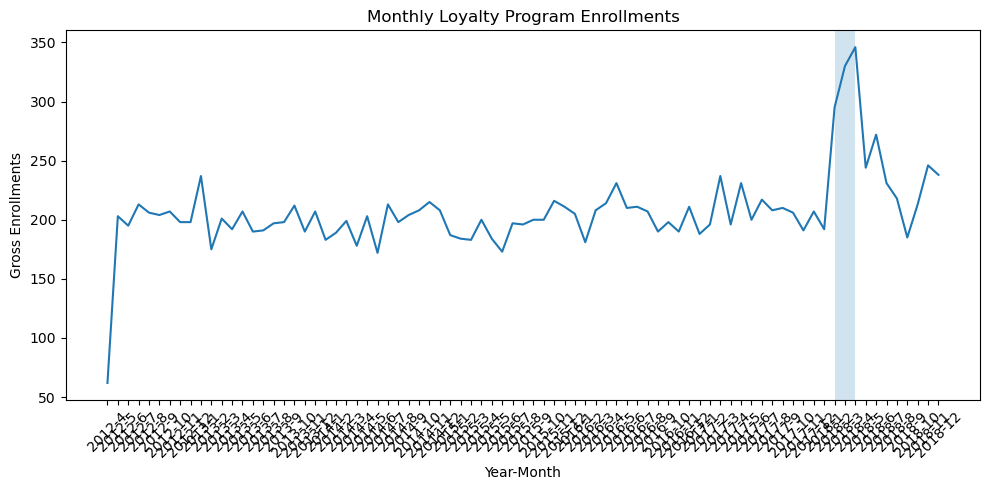

In [76]:
# Visualizations
import matplotlib.pyplot as plt

# monthly enrollments
plt.figure(figsize=(10, 5))

plt.plot(
    membership_trend['enrollment_year'].astype(str) + '-' +
    membership_trend['enrollment_month'].astype(str),
    membership_trend['gross_enrollments']
)

plt.axvspan('2018-2', '2018-4', alpha=0.2)
plt.title('Monthly Loyalty Program Enrollments')
plt.xlabel('Year-Month')
plt.ylabel('Gross Enrollments')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


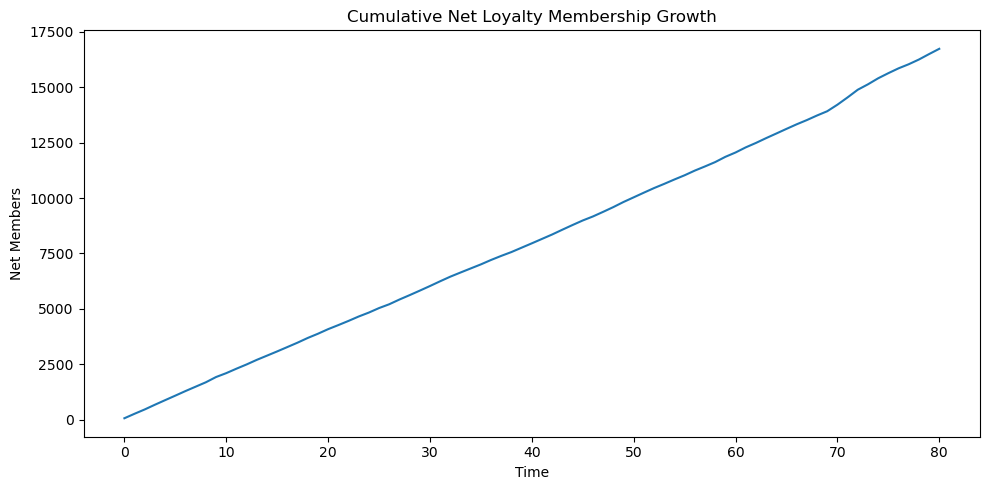

In [77]:
#cumulative members growth
plt.figure(figsize=(10, 5))

plt.plot(
    membership_trend['cumulative_net_members']
)

plt.title('Cumulative Net Loyalty Membership Growth')
plt.xlabel('Time')
plt.ylabel('Net Members')
plt.tight_layout()
plt.show()


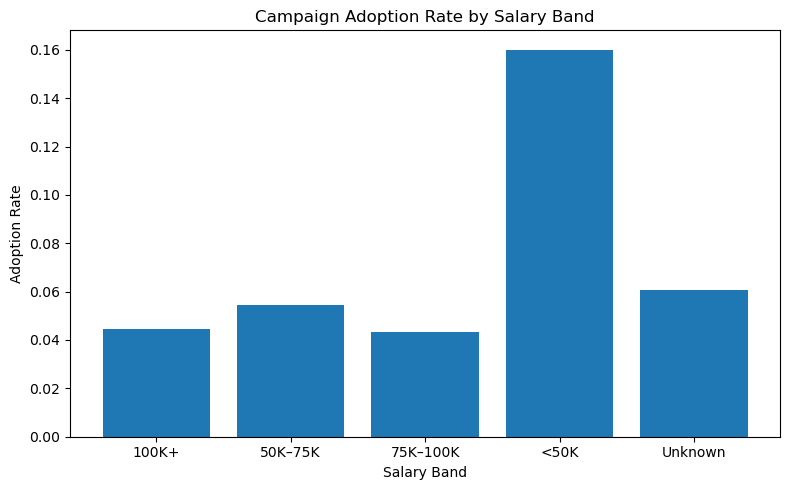

In [78]:
#salary adoption rate
plt.figure(figsize=(8, 5))

plt.bar(
    salary_adoption['salary_band'],
    salary_adoption['adoption_rate']
)

plt.title('Campaign Adoption Rate by Salary Band')
plt.xlabel('Salary Band')
plt.ylabel('Adoption Rate')
plt.tight_layout()
plt.show()


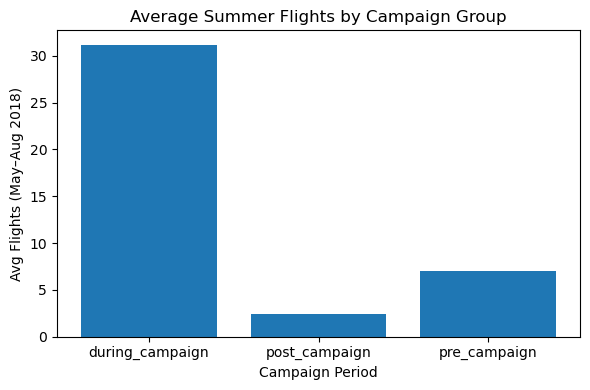

In [79]:
#summer flights
summer_summary = (
    summer_analysis
    .groupby('campaign_period')['summer_flights']
    .mean()
    .reset_index()
)

plt.figure(figsize=(6, 4))

plt.bar(
    summer_summary['campaign_period'],
    summer_summary['summer_flights']
)

plt.title('Average Summer Flights by Campaign Group')
plt.xlabel('Campaign Period')
plt.ylabel('Avg Flights (May–Aug 2018)')
plt.tight_layout()
plt.show()


In [80]:
# Recommedations

In [81]:
# Retain high-value loyalty members
# - Focus incentives on customers with the highest flight activity and lifetime value to prevent revenue loss.

# Re-engage inactive but previously loyal customers
# - Target members with strong past activity but recent inactivity using personalized win-back offers.

# Personalize rewards by loyalty tier
# - Align benefits to tier behavior instead of using one-size-fits-all promotions to improve conversion.

# Incentivize flight frequency, not just distance
# - Reward frequent flyers to encourage habitual travel and strengthen long-term loyalty.

# Use behavior trends to predict and prevent churn
# - Monitor declining activity and trigger early retention campaigns before customers disengage.